# Your first ML Project
This notebook had be made to help you to go trough, in a really simple way, machine learning project. In few minutes you will be able to run your first ML algorithm :-) .

In [15]:
from IPython.display import Image
display(Image('https://raw.githubusercontent.com/anisayari/your_first_machine_learning_project/master/images/machine-learning-everywhere.jpg', width=500, unconfined=True))

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `[alt text]('https://raw.githubusercontent.com/anisayari/your_first_machine_learning_project/master/images/machine-learning-everywhere.jpg')'


### Import all libraries required
* pandas is for Data manipulation (including reading data)
* numpy is for mathematacial function
* matplotlib and seaborn are for Data Visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read data
Pandas allow us to read data directly from the file. Here we have a csv.

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

## Understanting what we have to do ?
Here we have to determine if a passenger will survive or not to the Titanic tragedy. As you can notice the columns Survived is only two number. 1 = Survived , 0 = Died. So it is a classification problem. We will have to keep in mind this information to adapt our exploration and modeling strategy.
Here it's a supervised problem as we have a column of label.

In [3]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Have the preview of the trianing dataframe. The training dataframe is made for be able to learn from him as a Dev environement.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Have the preview of the testing dataframe. The testing dataframe is the dataframe that we will have to use to make prediction as a Prod environement.

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


You can notice that the column "Survived' is not present in the test dataframe. It's because it is our "label"/"target" column that we will need to predict. :-)

## STEP 1) Data Exploration
The first step of any ML project is to understand your data. Let's do it ! :-)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Know the type of your data is important. Some algorithm are really depend to some type and you may obtain an Error if you use not adapted type.
Here you can notice that "PassengerId, Survived,Pclass,Age,SibSp,Parch,Fare are numerical columns. And Name,Sex,Ticket, Cabin,Embarked are object columns (means string).

### Try to find why a person should survived or not ?
Rembering that it is a classification problem ? We will try to find what is different between the two categorical of person using train dataframe.

## Fill empty values
NULL values ? Empty values?
One of the first thing to do is to check for empty cell, that can be common source of error when your run an algorithm !

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fortunately we made this checked ! We got 177 empty values for Age and 687 for Cabin and 2 for Embarked ! You will notice along your data science journey that every dataset have to be clean before use ;) let's deal with those issues.

Fill Age

Fill Age with mean value not empty. We may did more sophisticated filling as for example take the mean for each Pclass and fill based on this features... try to do it ;).

In [8]:
train.loc[train.Age.isna(), 'Age'] = train[~train.Age.isna()].Age.mean()

Fill Cabin

Cabin empty... Perhaps they do not have a number of Cabin ? Let make this assumption


In [9]:
train.loc[train.Cabin.isna(),'Cabin'] = "No Cabin"

Embarked only two value empty, it's may not really smart to fill those value with "empty" value that will create a new class and set your future model more complex. 

Let's use the more representative port here, which is S (Southampton)

In [10]:
print(train.Embarked.value_counts())
train.loc[train.Embarked.isna(),'Embarked'] = "S"

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:
#Lets check if all nan value had been filled. All seem ok now !
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Outliers
We now need to check for outliers (not regular values compare to others)
Here we will try to verify some assumptions, as for example in first  the assumption that older people have more money (and btw a better Class ;)).
What is a boxplot ? check this link : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

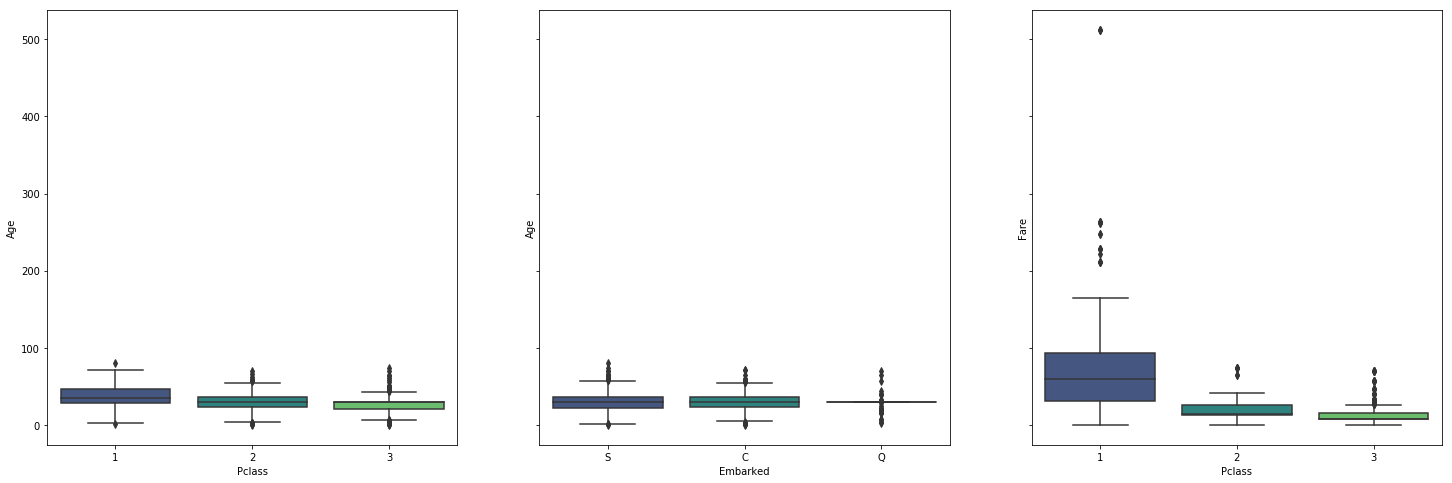

In [12]:
fig,axes = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(25,8))
print(axes)
sns.boxplot(x='Pclass',y='Age',data=train, palette='viridis',ax=axes[0])
sns.boxplot(x='Embarked',y='Age',data=train, palette='viridis',ax=axes[1])
# We now need to check for outlier (not regular value compare to others)
sns.boxplot(x='Pclass',y='Fare',data=train, palette='viridis',ax=axes[2])
plt.show()

It seem that few tickets have been really expensive compare to others ! let's take a closer look to those.

In [13]:
train.loc[train.Fare > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,No Cabin,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,No Cabin,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S


As we can notice some have several Cabisn but some not and they get a really expensive Cabin.

Line 250 Ward Anna seem to have paid 512$ ! As we know in the Titanic some Cabin can be really 

expensive compare to others perhaps it was the best Cabin ever made !

We can also notice that Line 679 Mr Thomas Drake Martinez, and Line 737 Mr Gustance had the same Fare , with the same number Ticket, perhaps there are traveling together ?

Here we will note try to change this outlier Fare, but perhaps you can try to manage some nice modification.

## Correlation matrix
A common way to find relation between variable is to plot correlation matrix. 
Here you can already find that Survived is higly depend of the class of the Ticket Class (Pclass), interesting isn't it ?

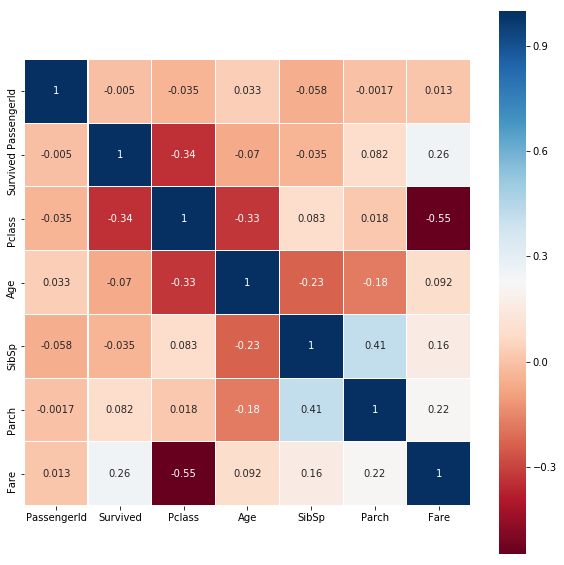

In [14]:

numerical_column = ['int64','float64'] #select only numerical features to find correlation
plt.figure(figsize=(10,10))
sns.heatmap(
    train.select_dtypes(include=numerical_column).corr(),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)

## Pairplot / scatter matrix
An other comomon thing to do in Classification if to plot a pair plot which is a figure that allow you to see the distribution of each data compare to others in different colors regarding your label column (here Survived). You can already notive the different distribution of Pclass.

It seem that the cheapeast class have lowest change of survive... It seem also that people with no parent/child aboard the titanic regarding Parch as highest change to survive... hum let's keep in mind this for later.

/anaconda3/envs/datascience-env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/datascience-env/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/datascience-env/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/envs/datascience-env/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(

<Figure size 720x720 with 0 Axes>

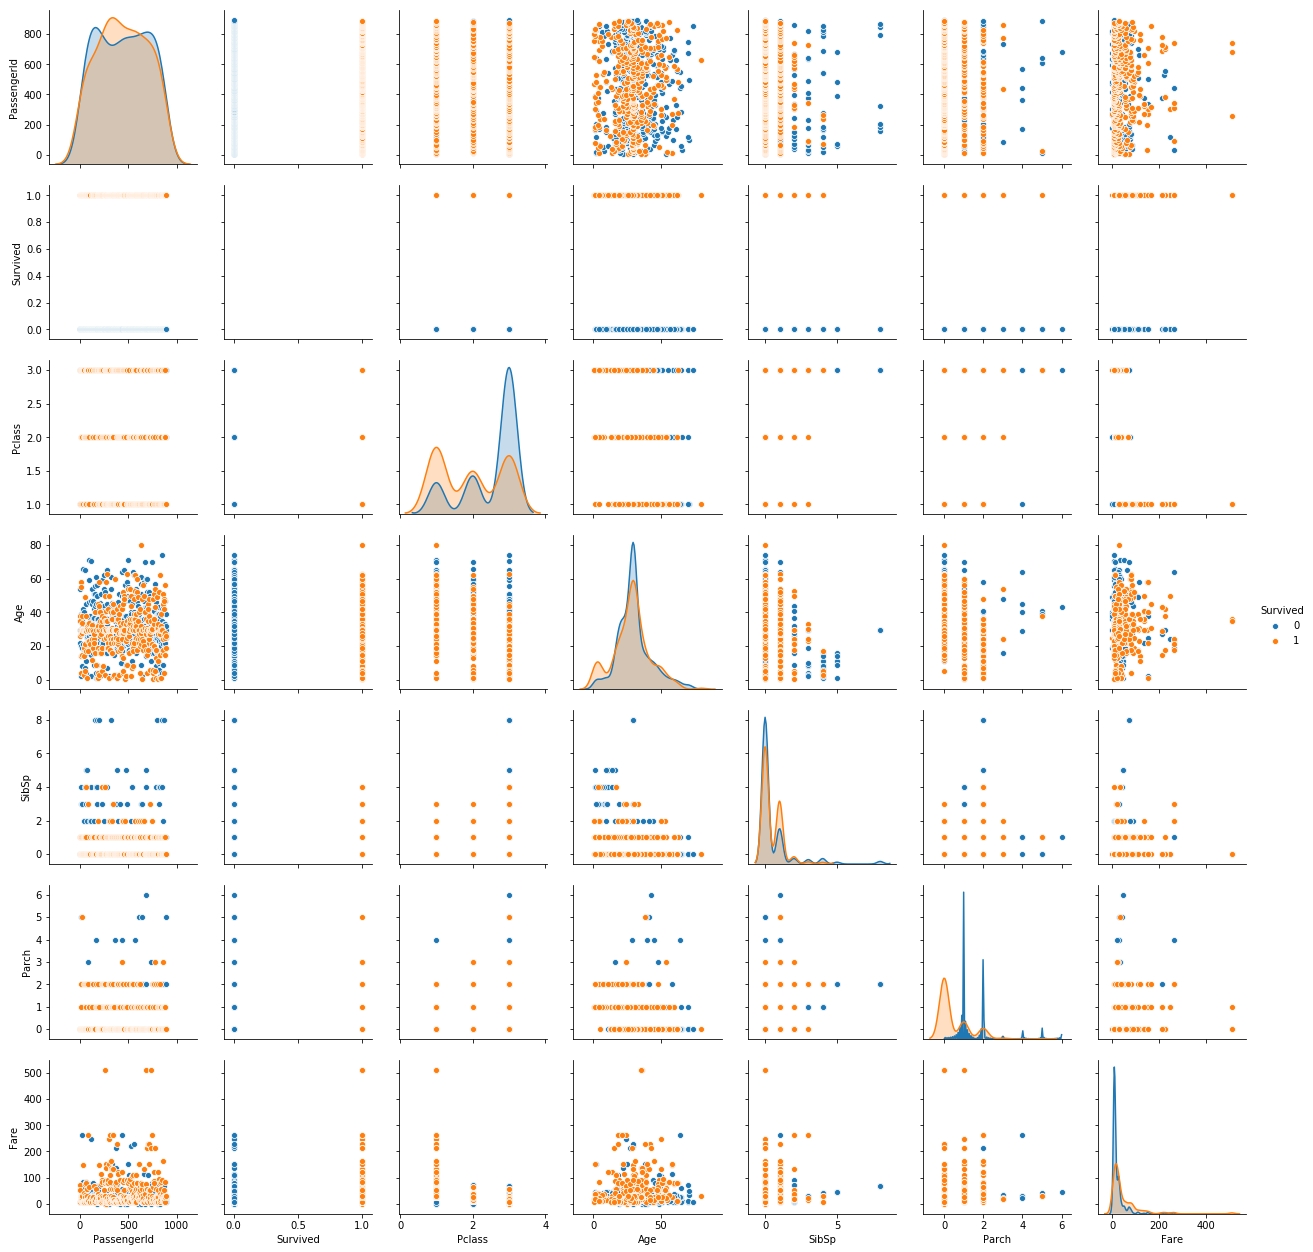

In [15]:
plt.figure(figsize=(10,10))
sns.pairplot(train.select_dtypes(include=numerical_column), hue = 'Survived')

## Few other checks
We can notice, regarding the Age distrubition that children have been (most of the time) saved !
'Save women and children in first' should be at the last really true... but wait ! We don't have Sex ditrbution here
as it's an object column, and pairplot do not support "object" column let change that.

In [16]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# thank to the open-source world , we do not need to waste so many time here ! LabelEncore from sckit-learn allow us to convert this text categorical data into numbers ! :O
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Sex'] = labelencoder.fit_transform(train['Sex'])
train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

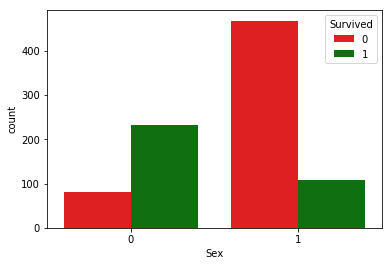

In [18]:
#Lets now print the Age distrubtion regarding survived
palette ={1:"g", 0:"r"}
sns.countplot(x='Sex',data=train,hue="Survived", palette=palette)

Indeed, our assumption was correct.We can notice that indeed women have better chance of survive during this tragedy.

## STEP 2) Features Engineering
This step is made to be able to get maximum of information from data, by, for example create new columns or change something in a column as we just already did with the "Sex" column.
I recommend to create a features_engineering to have a common modification between ur train and testing through just one function :-).

I will be really simple here to give you the opportunity to create and add some new features and test it in your model and do not forget to add here all features modification you might already did during the previous step.
### !! Be sure to never include your target/label column in a features engineering process !!

In [19]:
def features_engineering(df):
    df.loc[df.Age.isna(), 'Age'] = df[~df.Age.isna()].Age.mean()
    df.loc[df.Cabin.isna(),'Cabin'] = "No Cabin"
    df.loc[df.Embarked.isna(),'Embarked'] = "S"
    df['persons_abroad_size'] = (df['Parch']+df['SibSp']).astype(int)
    df['alone'] = np.where(df['Parch']==0,1,0)
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    df['Sex'] = df['Sex'].map( {'male': 1, 'female': 2} ).astype(int)
    df['Fare'] = df['Fare'].apply(np.log)
    df['Room'] = (df['Cabin']
                    .str.slice(1,5).str.extract('([0-9]+)', expand=False)
                    .fillna(0)
                    .astype(int))
    df['RoomBand'] = 0
    df.loc[(df.Room > 0) & (df.Room <= 20), 'RoomBand'] = 1
    df.loc[(df.Room > 20) & (df.Room <= 40), 'RoomBand'] = 2
    df.loc[(df.Room > 40) & (df.Room <= 80), 'RoomBand'] = 3
    df.loc[df.Room > 80, 'RoomBand'] = 4
    df_id = df.PassengerId
    df = df.drop('PassengerId', axis=1)
    return df,df_id

In [20]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train,train_id = features_engineering(train)
test,test_id = features_engineering(test)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived               891 non-null int64
Pclass                 891 non-null int64
Name                   891 non-null object
Sex                    891 non-null int64
Age                    891 non-null float64
SibSp                  891 non-null int64
Parch                  891 non-null int64
Ticket                 891 non-null object
Fare                   891 non-null float64
Cabin                  891 non-null object
Embarked               891 non-null int64
persons_abroad_size    891 non-null int64
alone                  891 non-null int64
Room                   891 non-null int64
RoomBand               891 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 104.5+ KB


## STEP 3) Model and save your prediction
Here it's the construction of our model, we will use all numerical column and XGboost algorithm. XGB is on of the most famous algorithm you will see in Kaggle platform by it's capacity to automatize a large number of process.

In [22]:
import xgboost as xgb
from sklearn import model_selection
X_train = train.drop('Survived',axis=1).select_dtypes(include=['int32','int64','float64'])
y_train = train['Survived']
X_test = test.select_dtypes(include=['int32','int64','float64'])

xg_boost = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Train your model with your train dataset

In [23]:
xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Evaluation of your model

In [24]:
print(xg_boost.score(X_train, y_train))

scores = model_selection.cross_val_score(xg_boost, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print("Kfold on XGBClassifier: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

0.8810325476992144
[0.80446927 0.83240223 0.86516854 0.79213483 0.85875706]
Kfold on XGBClassifier: 0.8306 (+/- 0.0288)


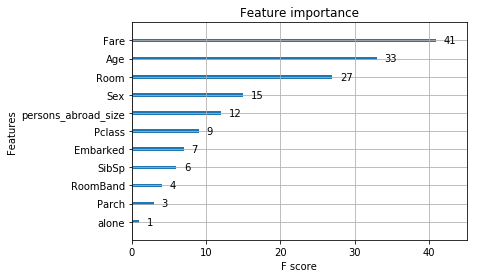

In [25]:
xgb.plot_importance(xg_boost)
plt.show()

82% of accuracy during a cross validation is a correct score for the first shot in a binary classification. Try to improve this ! :) 
Now let's predict our testing value

In [26]:
Y_pred = xg_boost.predict(X_test)

In [27]:
submission = pd.DataFrame({
    "PassengerId": test_id, 
    "Survived": Y_pred 
})
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


Your file predict is ready to be save !  C ongratulations you jsute made your first machine learning project !

In [28]:
submission.to_csv('submission.csv', index=False)